In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None)
df.columns= ['Symboling', 'NormalizedLosses', 'Make', 'FuelType', 'Aspiration', 'NumOfDoors', 'BodyStyle', 'DriveWheels', 'EngineLocation', 'WheelBase', 'Length', 'Width', 'Height', 'CurbWeight', 'EngineType', 'NumOfCylinders', 'EngineSize', 'FuelSystem', 'Bore', 'Stroke', 'CompressionRatio', 'Horsepower', 'PeakRpm', 'CityMpg', 'HighwayMpg', 'Price']

In [3]:
df = df.replace('?', np.nan)
df.head()

,Symboling,NormalizedLosses,Make,FuelType,Aspiration,NumOfDoors,BodyStyle,DriveWheels,EngineLocation,WheelBase,...,EngineSize,FuelSystem,Bore,Stroke,CompressionRatio,Horsepower,PeakRpm,CityMpg,HighwayMpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
print(df.FuelType.value_counts())

FuelType
gas       185
diesel     20
Name: count, dtype: int64


In [5]:
df['NormalizedLosses'] = df['NormalizedLosses'].fillna(pd.to_numeric(df['NormalizedLosses']).mean(skipna=True))
df.head()

,Symboling,NormalizedLosses,Make,FuelType,Aspiration,NumOfDoors,BodyStyle,DriveWheels,EngineLocation,WheelBase,...,EngineSize,FuelSystem,Bore,Stroke,CompressionRatio,Horsepower,PeakRpm,CityMpg,HighwayMpg,Price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
# Performing label encoding on the categorical features
ohe = OneHotEncoder()
le = LabelEncoder()
df.FuelType = le.fit_transform(df.FuelType)
df = pd.get_dummies(df, columns = ['Make', 'Aspiration', 'NumOfDoors', 'BodyStyle', 'DriveWheels', 'EngineLocation', 'EngineType', 'NumOfCylinders', 'FuelSystem'])
df.head()

,Symboling,NormalizedLosses,FuelType,WheelBase,Length,Width,Height,CurbWeight,EngineSize,Bore,...,NumOfCylinders_twelve,NumOfCylinders_two,FuelSystem_1bbl,FuelSystem_2bbl,FuelSystem_4bbl,FuelSystem_idi,FuelSystem_mfi,FuelSystem_mpfi,FuelSystem_spdi,FuelSystem_spfi
0,3,122.0,1,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,True,False,False
1,3,122.0,1,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,True,False,False
2,1,122.0,1,94.5,171.2,65.5,52.4,2823,152,2.68,...,False,False,False,False,False,False,False,True,False,False
3,2,164,1,99.8,176.6,66.2,54.3,2337,109,3.19,...,False,False,False,False,False,False,False,True,False,False
4,2,164,1,99.4,176.6,66.4,54.3,2824,136,3.19,...,False,False,False,False,False,False,False,True,False,False


In [7]:
df.dropna(inplace=True)
df.shape

(195, 75)

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
max_acc = 0
acc_list = []
param_list = []
for i in range(10):
    sample_df = df.sample(frac=0.40, replace=False)
    x_train, x_test, y_train, y_test = train_test_split(sample_df.drop('FuelType', axis=1), sample_df.FuelType, test_size=0.3, random_state=42, stratify=sample_df.FuelType)
    x_train = StandardScaler().fit_transform(x_train)
    param_grid = {
                'C':[0.1, 0.5, 1, 2, 3],
                'kernel':['rbf', 'poly', 'sigmoid', 'linear'],
                'degree':[1, 2, 3, 4],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
                }

    grid = GridSearchCV(SVC(max_iter=100), param_grid)
    grid.fit(x_train, y_train)
    y_pred = grid.predict(x_test)
    print(grid.best_params_)
    print('Sample {}'.format(i+1))
    print('Accuracy: {}\n'.format(accuracy_score(y_test, y_pred)))

    acc_list.append(accuracy_score(y_test, y_pred))
    param_list.append(grid.best_params_)

    if accuracy_score(y_test, y_pred) > max_acc:
        max_acc = accuracy_score(y_test, y_pred)
        best_params = grid.best_params_
        best_model = grid.best_estimator_
        best_sample_df = sample_df

{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
Sample 1
Accuracy: 0.4583333333333333

{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
Sample 2
Accuracy: 0.3333333333333333

{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
Sample 3
Accuracy: 0.9166666666666666

{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
Sample 4
Accuracy: 0.7083333333333334

{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
Sample 5
Accuracy: 0.9166666666666666

{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
Sample 6
Accuracy: 0.9166666666666666

{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
Sample 7
Accuracy: 0.125

{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
Sample 8
Accuracy: 0.16666666666666666

{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
Sample 9
Accuracy: 0.75

{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
Sample 10
Accuracy: 0.9583333333333334



In [10]:
print(acc_list)
print(param_list)

[0.4583333333333333, 0.3333333333333333, 0.9166666666666666, 0.7083333333333334, 0.9166666666666666, 0.9166666666666666, 0.125, 0.16666666666666666, 0.75, 0.9583333333333334]
[{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}, {'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}, {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}]


In [11]:
final_df = pd.DataFrame(data=[acc_list, param_list], index=['Accuracy', 'Parameters']).T
final_df

,Accuracy,Parameters
0,0.458333,"{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': ..."
1,0.333333,"{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': ..."
2,0.916667,"{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
3,0.708333,"{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': ..."
4,0.916667,"{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': ..."
5,0.916667,"{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': ..."
6,0.125,"{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': ..."
7,0.166667,"{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': ..."
8,0.75,"{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': ..."
9,0.958333,"{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': ..."


In [12]:
print(max_acc)
print(best_params)
print(best_model)
best_sample_df.head()

0.9583333333333334
{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
SVC(C=0.1, degree=1, gamma=1, kernel='poly', max_iter=100)


,Symboling,NormalizedLosses,FuelType,WheelBase,Length,Width,Height,CurbWeight,EngineSize,Bore,...,NumOfCylinders_twelve,NumOfCylinders_two,FuelSystem_1bbl,FuelSystem_2bbl,FuelSystem_4bbl,FuelSystem_idi,FuelSystem_mfi,FuelSystem_mpfi,FuelSystem_spdi,FuelSystem_spfi
161,0,91,1,95.7,166.3,64.4,52.8,2122,98,3.19,...,False,False,False,True,False,False,False,False,False,False
182,2,122,0,97.3,171.7,65.5,55.7,2261,97,3.01,...,False,False,False,False,False,True,False,False,False,False
192,0,122.0,0,100.4,180.2,66.9,55.1,2579,97,3.01,...,False,False,False,False,False,True,False,False,False,False
150,1,87,1,95.7,158.7,63.6,54.5,1985,92,3.05,...,False,False,False,True,False,False,False,False,False,False
15,0,122.0,1,103.5,189.0,66.9,55.7,3230,209,3.62,...,False,False,False,False,False,False,False,True,False,False


In [13]:
iterations = list()
acc_list = list()
x_train, x_test, y_train, y_test = train_test_split(best_sample_df.drop('FuelType', axis=1), best_sample_df.FuelType, test_size=0.3, random_state=42, stratify=best_sample_df.FuelType)
x_train = StandardScaler().fit_transform(x_train)

for i in range(100):
    x = i+1
    svm = SVC(C=2, degree=1, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)

In [14]:
iterations = np.array(iterations)
acc_list = np.array(acc_list)

In [15]:
print(iterations.shape)
print(acc_list.shape)

(100,)
(100,)


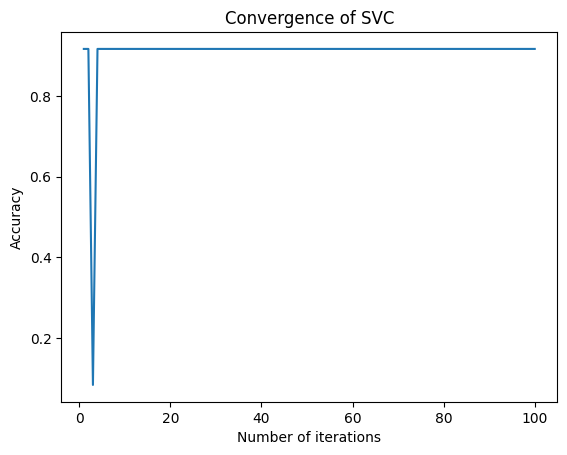

In [16]:
plt.plot(iterations, acc_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()